![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [84]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("Dataset/schools.csv")

# Preview the data
schools.head()

best_math_schools = schools[schools['average_math'] >= 0.80*800]

best_math_schools = best_math_schools[["school_name","average_math"]].sort_values(['average_math'],ascending = False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


In [85]:
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


In [86]:
# the 10 best performing schools based on the total score across the three SAT sections.

schools['total_SAT'] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197
...,...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6,1086
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5,1114
372,Channel View School for Research,Queens,Q410,427,430,423,76.6,1280
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5,1207


In [92]:
SAT_for_each_school = schools.groupby('school_name')['total_SAT'].sum()
top_10_schools = SAT_for_each_school.sort_values(ascending=False)
top_10_schools = top_10_schools.head(10)
top_10_schools = pd.DataFrame(top_10_schools)
top_10_schools

,total_SAT
school_name,
Stuyvesant High School,2144
Staten Island Technical High School,2041
Bronx High School of Science,2041
High School of American Studies at Lehman College,2013
Townsend Harris High School,1981
Queens High School for the Sciences at York College,1947
Bard High School Early College,1914
Brooklyn Technical High School,1896
Eleanor Roosevelt High School,1889


In [88]:
#Locating the NYC borough with the largest standard deviation in SAT performance
SAT_perf = schools.groupby('borough').agg(
    num_schools= ('school_name','count'),
    avg_SAT= ('total_SAT','mean'),
    std_SAT= ('total_SAT','std')
)
SAT_perf

,num_schools,avg_SAT,std_SAT
borough,,,
Bronx,98,1202.724490,150.393901
Brooklyn,109,1230.256881,154.868427
Manhattan,89,1340.134831,230.294140
Queens,69,1345.478261,195.252899
Staten Island,10,1439.000000,222.303596


In [91]:
large_std_dev = round(SAT_perf['std_SAT'].sort_values(ascending=False), 2)
large_std_dev

borough
Manhattan        230.29
Staten Island    222.30
Queens           195.25
Brooklyn         154.87
Bronx            150.39
Name: std_SAT, dtype: float64

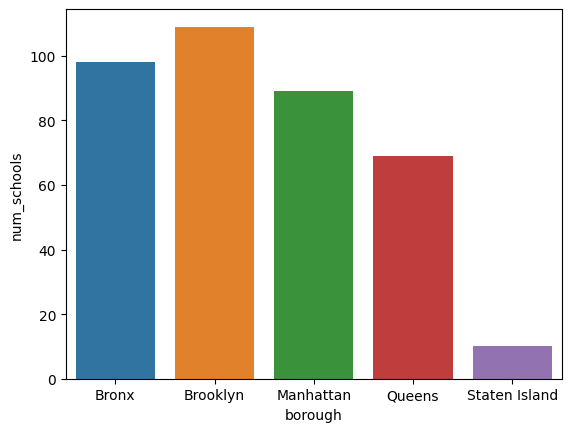

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=SAT_perf, x='borough', y='num_schools', hue='borough')
plt.show()

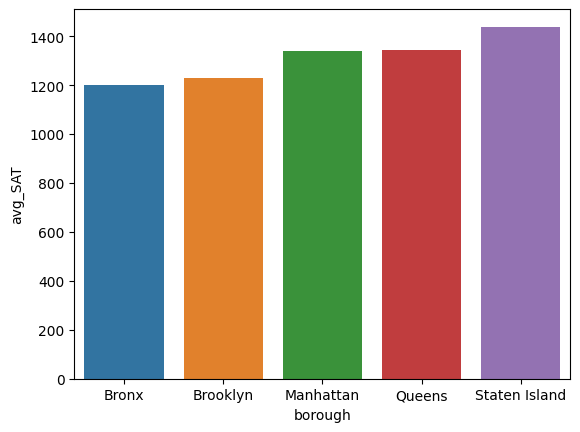

In [106]:
sns.barplot(data=SAT_perf,x = 'borough',y = 'avg_SAT',hue = 'borough')
plt.show()

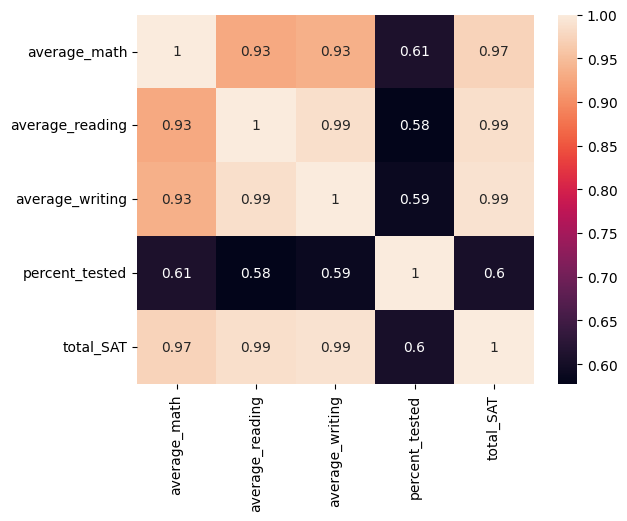

In [112]:
sns.heatmap(schools.corr(),annot=True)
plt.show()

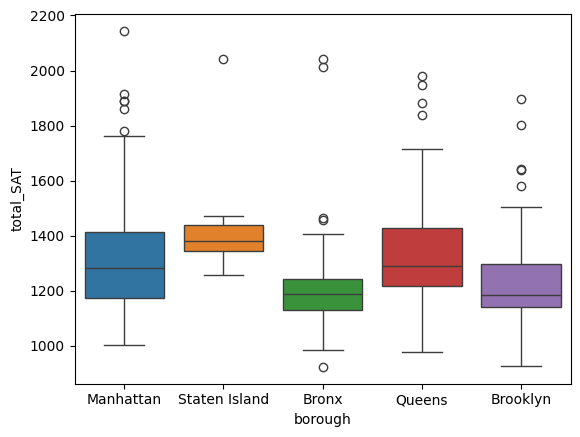

In [116]:
sns.boxplot(data = schools,x = 'borough', y = 'total_SAT', hue='borough')
plt.show()

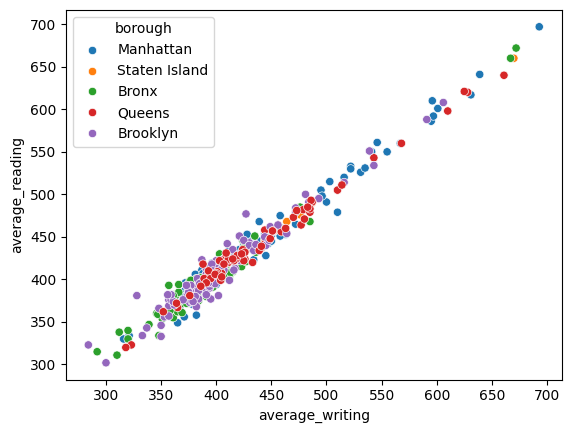

In [124]:
sns.scatterplot(data=schools, x='average_writing', y='average_reading', hue='borough')
plt.show()

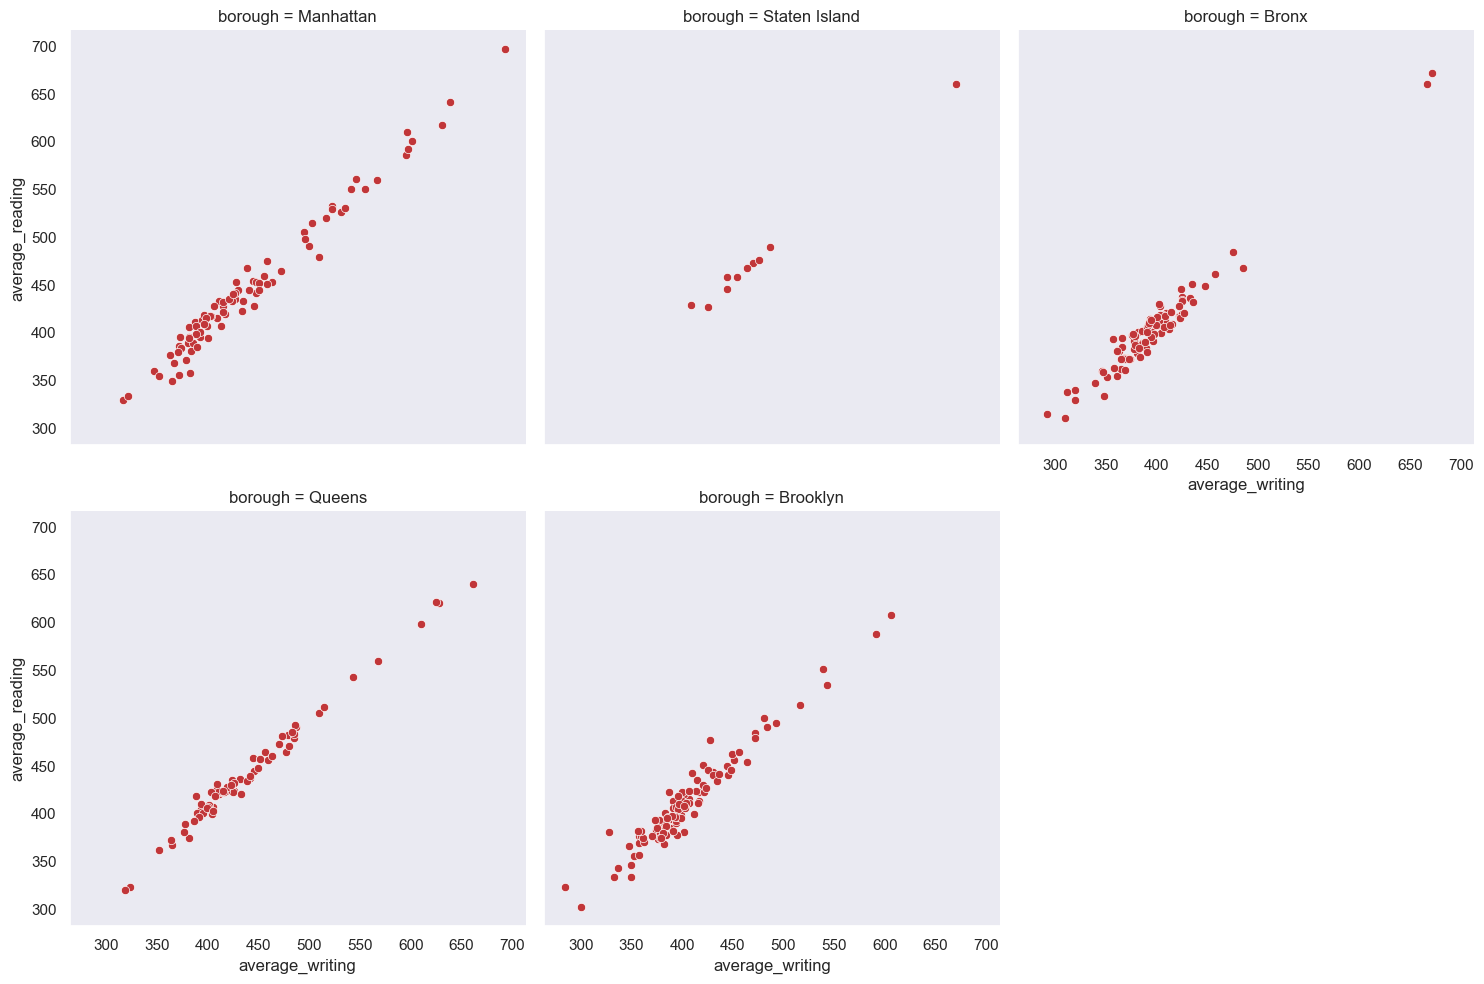

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')
sns.relplot(data=schools, x='average_writing', y='average_reading', kind='scatter', col='borough', col_wrap=3)
plt.show()